# Assignment 1.2: 

# Theory 
## Questions 
- Why apply a logarithm on the likelihood?  
- What are analytical reasons?  
- What are numerical reasons?  
- Does it affect the estimator?  


## Answers:

### Why apply a logarithm on the likelihood ?

Applying the logarithm is a mathematical trick, which makes the next calculations easier. Instead of a Profuct over the probabilities we get through $log(A * B) = log(A) * log(B)$ a sum over the probabilities. In conlcusion, to simplify calculations and improve numerical stability

### What are analytical reasons ?

Derivatives: For maximizing the likelihood, we have to build the derivative and set it to zero. So the derivative of a product is more complex than the derivative of a sum. Often probability density functions rely on exponential terms which can cancel out with the logarithmic part and give "nice" closed forms for the estimators.

### What are numerical reasons ?

Computing product directly is numerical instable (leads very fast to extremly tiny numbers, which are treated as 0 by computers). Thus, computing sums is more robust.

## Does it affect the estimator ?

No, it does not. It's a mathematical transformation, that simplifies the calculation process while preserving the location of the maximum.


## Task 1
We observe an experiment $D=\{x_1,\cdots, x_n\}$ with i.i.d. $x_i \sim p(x_i|\mu,\sigma^2) = \dfrac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$.
What is the MLE for $\mu$ and $\sigma^2$ ?


### Solution:

The Maximum likelihood estimator is given by

\begin{align*}
    \widehat{(\mu,\sigma^2)}_{\text{ML}}
    =\text{argmax}_{\mu,\sigma^2}\sum_{i=1}^n\log(p(x_i|\mu,\sigma^2))
    &=\text{argmax}_{\mu,\sigma^2}\sum_{i=1}^n\log\biggl(\frac{1}{\sqrt{\sigma^2 2\pi}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\biggl)\\
    &=\text{argmax}_{\mu,\sigma^2}\sum_{i=1}^n\log(\frac{1}{\sqrt{\sigma^2 2\pi}})+\log\biggl(e^{-\frac{(x_i-\mu)^2}
    {2\sigma^2}}\biggl)\\
    &=\text{argmax}_{\mu,\sigma^2}-n\log(\sqrt{2\pi})-\frac{n}{2}\log(\sigma^2)-\frac{1}{2}\sum_{i=1}^n\frac{(x_i-\mu)^2}
    {\sigma^2}.
\end{align*}

Let $$L(\mu,\sigma^2)=-n\log(\sqrt{2\pi})-\frac{n}{2}\log(\sigma^2)-\frac{1}{2}\sum_{i=1}^n\frac{(x_i-\mu)^2}{\sigma^2}$$ be a function.
From 
\begin{align*}
    0=\frac{\partial L}{\partial \mu}(\mu,\sigma^2)=\sum_{i=1}^n\frac{(x_i-\mu)}
    {\sigma^2}
\end{align*}
and the fact that $\frac{1}{\sigma^2}\neq 0$ we get that the MLE for $\mu$ is independent of $\sigma^2$ and that $$\widehat{\mu}_{\text{ML}}=\frac{1}{n}\sum_{i=1}^n x_i.$$

Similiar to above, setting the directional derivative to zero we get 
\begin{align*} 
    0=\frac{\partial L}{\partial \sigma^2}(\mu,\sigma^2)
    &=-\frac{n}{2\sigma^2}-(\frac{1}{2}\sum_{i=1}^n(x_i-\mu)^2)\frac{\partial}{\partial \sigma^2}(\frac{1}{\sigma^2})\\
    &=\frac{1}{2\sigma^2}(\sum_{i=1}^n\frac{(x_i-\mu)^2} {\sigma^2}-n)\\
\end{align*} 
and since $\frac{1}{2\sigma^2}\neq 0$ we get 

$$\sum_{i=1}^n\frac{(x_i-\mu)^2}{\sigma^2}=n$$ 
which turns out to be equivalent to 
$$\sigma^2=\frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2$$

and thus the maximum likelihood estimator for $\sigma^2$ is given by
$$\widehat{\sigma^2}_{\text{ML}}=\frac{1}{n}\sum_{i=1}^n(x_i-\widehat{\mu}_{\text{ML}})^2$$

## Task 2
We observe an experiment $D=\{(x_1,y_1),\cdots, (x_n,y_n)\}$. We assume a linear model with Gaussian noise: $y_i = x_i\cdot a + b + \epsilon_i$  with i.i.d. $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$.
       What is the MLE for $a,b$ and $\sigma^2$ ?
       


### Solution:

First note that $y_i\sim \mathcal{N}(ax_i+b,\sigma^2)$ and define $\overline{x}=\frac{1}{n}\sum_{i=1}^nx_i$ and $\overline{y}=\frac{1}{n}\sum_{i=1}^ny_i$
The maximum likelihood estimator is given by 
\begin{align*}
\widehat{(a,b,\sigma^2)}_{\text{ML}}
&=\text{argmax}_{a,b,\sigma^2}\sum_{i=1}\log(1/\sqrt{2\pi \sigma^2})-\frac{1}{2\sigma^2}(y_i-(ax_i+b))^2\\
&=\text{argmax}_{a,b,\sigma^2}n\log(1/\sqrt{2\pi})-\frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}(y_i-(ax_i+b))^2\\
&=\text{argmax}_{a,b,\sigma^2}L(a,b,\sigma^2),
\end{align*}
where 
$$L(a,b,\sigma^2)=n\log(1/\sqrt{2\pi})-\frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}(y_i-(ax_i+b))^2$$
First we are determining $\hat{a}_{\text{ML}},\hat{b}_{\text{ML}}$. 
Setting the derivitave in direction $b$ zero we get
$$0=\frac{\partial }{\partial b}L(a,b,\sigma^2)=-\frac{1}{\sigma^2}\sum_{i=1}^n(y_i-(ax_i+b))$$
from which we get the following chain of implications
$$0=\sum_{i=1}^n(y_i-ax_i-b)\implies b=\frac{1}{n}\sum_{i=1}^ny_i-\frac{a}{n}\sum_{i=1}^n x_i=\overline{y}-a\overline{x}$$
Setting the directional (w.r.t $a$) zero and plugging in this $b=\overline{y}-a\overline{x}$  we get  
$$0=\frac{\partial }{\partial a}L(a,b,\sigma^2)=-\frac{1}{\sigma^2}\sum_{i=1}^n x_i(y_i-(ax_i+\overline{y}-a\overline{x}))
\implies 0= \sum_{i=1}^n x_i y_i- \overline{y}\sum_{i=1}^n x_i -a\biggl(\sum_{i=1}^n x_i^2-\overline{x}\sum_{i=1}^nx_i\biggl)$$
by bringing the right term on the lefthand side we get 
$$a\biggl(\sum_{i=1}^n x_i^2-\overline{x}\sum_{i=1}^nx_i\biggl)=\sum_{i=1}^n x_i y_i- \overline{y}\sum_{i=1}^n x_i
\implies a = \frac{\sum_{i=1}^n x_i y_i- \overline{y}\sum_{i=1}^n x_i}{\sum_{i=1}^n x_i^2-\overline{x}\sum_{i=1}^nx_i}$$
Keeping $\sum_{i=1}^n x_i=n\overline{x}$ and $\sum_{i=1}^n y_i=n\overline{y}$ in mind we get
\begin{align*}
\sum_{i=1}^n x_i y_i- \overline{y}\sum_{i=1}^n x_i
&=\sum_{i=1}^n x_i y_i- \overline{y}\sum_{i=1}^n x_i- n\overline{x}\overline{y} + n\overline{x}\overline{y}\\
&=\sum_{i=1}^n x_i y_i- \overline{y}\sum_{i=1}^n x_i- \overline{x}\sum_{i=1}^ny_i + \sum_{i=1}^n\overline{x}\overline{y}\\
&=\sum_{i=1}^n x_i y_i-\overline{y}x_i- \overline{x}y_i+\overline{x}\overline{y}\\
&=\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})
\end{align*}
and 
\begin{align*}
\sum_{i=1}^n x_i^2-\overline{x}\sum_{i=1}^nx_i
&=\sum_{i=1}^n x_i^2-n\overline{x}^2\\
&=\sum_{i=1}^n x_i^2-2 n\overline{x}^2+ n\overline{x}^2\\
&=\sum_{i=1}^n x_i^2-\sum_{i=1}^n 2 \overline{x}x_i + \sum_{i=1}^n \overline{x}^2\\
&=\sum_{i=1}^n x_i^2-2 \overline{x}x_i+\overline{x}^2\\
&=\sum_{i=1}^n(x_i-\overline{x})^2
\end{align*}
and thus we have 
$$a_{\text{ML}}=\frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n(x_i-\overline{x})^2}\;\;\;\text{and}\;\;\;\;b_{\text{ML}}=\overline{y}-a_{\text{ML}}\overline{x}$$
Similiar to the above we get that the maximum likelihood estimator for $\sigma^2$ is given by 

$$\hat{\sigma^2}_{\text{ML}}=\frac{1}{n}\sum_{i=1}^n(y_i-(\hat{a}_{\text{ML}}x_i-\hat{b}_{\text{ML}}))^2$$

## Task 3
Assume we have a Bernoulli process, where we toss a coin multiple times.  
Let $D = (x_1, x_2, . . . , x_7) = (0, 0, 1, 1, 0, 0, 1)$ be the measurements. 
Assume $p(x_i|\theta)=
\begin{cases}
\theta  & \text{if} ~ x_i=1 ~ (head),\\
1-\theta ~ &\text{if} ~ x_i=0 ~ (tail)
\end{cases}$

- Let $p(\theta)=\mathcal{N}(0.5,0.1)$. What is the MAP estimator $\theta_{MAP}$? What is the probability of tossing tails two times $P(x_8=0, x_9=0|\theta_{MAP})$
- Let $p(\theta)=\mathcal{U}(0,1)$. What is the probability of the next toss to be head $P(x_8=1|D)$ 


### Solution:

We have that 
$$p(D|\theta)=\prod_{i=1}^7p(x_i|\theta)=\theta^3(1-\theta)^4$$
since every coinflip is independent from each other. 

Now in the case $p(\theta)=\mathcal{N}(\mu,\sigma^2)$ with $\mu=\frac{1}{2}$ and $\sigma^2=\frac{1}{10}$, 
we have that 
\begin{align*}
\theta_{\text{MAP}}
=\text{argmax}_{\theta}p(D|\theta)p(\theta)
&=\text{argmax}_{\theta}\sqrt\frac{5}{\pi}\theta^3(1-\theta)^4\exp(-5(\theta-\frac{1}{2})^2)\\
&=\text{argmax}_{\theta}\theta^3(1-\theta)^4\exp(-5(\theta-\frac{1}{2})^2)
\end{align*}
where the last step is possible because constants don't affect the argument of the maxima.


Now let 
$$L(\theta)=\theta^3(1-\theta)^4\exp(-5(\theta-\frac{1}{2})^2).$$
Then we have that 
\begin{align*}
\frac{\text{d}}{\text{d}\theta}L(\theta)
&=\exp(-5(\theta-\frac{1}{2})^2)(3\theta^2(1-\theta)^4-4\theta^3(1-\theta)^3+5\theta^3(1-\theta)^4(1-2\theta))\\
&=\exp(-5(\theta-\frac{1}{2})^2)\theta^2(1-\theta)^3(2\theta-3)(5\theta^2-1)
\end{align*}
Setting the derivative zero
$$0=\frac{\text{d}}{\text{d}\theta}L(\theta)=\exp(-5(\theta-\frac{1}{2})^2)\theta^2(1-\theta)^3(2\theta-3)(5\theta^2-1)$$
we get two candidates for the maximum a posteriori estimator 
$$\theta_1=\frac{3}{2}\;\;\;\;\text{or}\;\;\;\;\theta_2=\frac{1}{\sqrt{5}}.$$
Since we have 
$$L(\frac{3}{2})=\frac{27}{128e^5}\approx 0.00142\;\;\;\text{and}\;\;\;L(\frac{1}{\sqrt{5}})=\frac{(5-\sqrt{5})^4e^{\sqrt{5}-\frac{9}{4}}}{3125\sqrt{5}}\approx 0.008236$$
we conclude that
$$\theta_{\text{MAP}}=\frac{1}{\sqrt{5}}.$$

We have that 
$$P(x_8=0,x_9=0|\theta_{\text{MAP}})=p(x_8=0|\theta_{\text{MAP}})\cdot p(x_9=0|\theta_{\text{MAP}})=(1-\frac{1}{\sqrt{5}})^2=\frac{6-2\sqrt{5}}{5}\approx 0.3056$$

Now let $p(\theta)=\mathcal{U}(0,1)$, in this case we have that
\begin{align*}
P(x_8=1|D)
&=\frac{\int p(x_8=1|\theta)p(D|\theta)p(\theta)\;\text{d}\theta}{\int p(D|\theta)p(\theta)\;\text{d}\theta}\\
&=\frac{\int_0^1 \theta^4(1-\theta)^4\;\text{d}\theta}{\int_0^1 \theta^3(1-\theta)^4\;\text{d}\theta}\\
&=\frac{280}{630}=\frac{4}{9}
\end{align*}

# Praxis

The goal of the exercise is to implement a Maximum Likelihood Estimator for a normal distribution.  
We create $n$ data samples from a 2D normal distribution $X_i \sim \mathcal{N}(\mu, \Sigma)$

We would like to estimate the mean $mu$ using a numerical appraoch with gradient ascent.

[1. 1.] [[5. 0.]
 [0. 5.]]


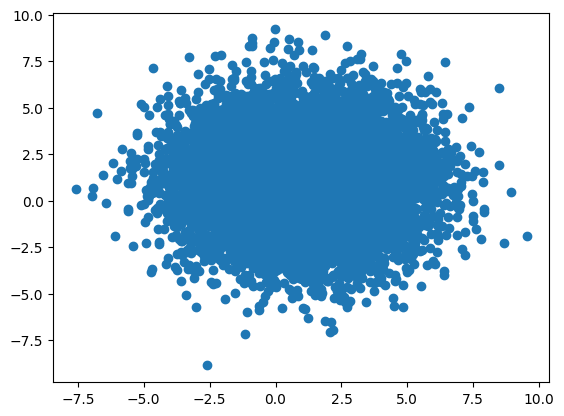

In [ ]:
import numpy as np 
import torch
import matplotlib.pyplot as plt

n = 10000 # number of samples (descrease the number if computations take too much time)
mu, sigma = np.ones(2), 5*np.eye(2) # mean and standard deviation of ground truth distribution
print(mu, sigma)
data = np.random.multivariate_normal(mu, sigma, n) # sample n data points from the distribution
plt.scatter(data[:,0],data[:,1])
plt.show()


# Maximum Likelihood

The likelihood of a single data point is given as:  
$$p(x; \mu, \Sigma) = \dfrac{1}{\sqrt{|\Sigma|(2\pi)^2}} 
  \exp\left( -\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T \right)$$

The log-likelihood is:
$$\log (p(x; \mu, \Sigma)) =-\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T  + C $$

The joint likelihood over the whole data is:  
$$p(D;\mu, \Sigma) = \prod_i^n p(x_i; \mu, \Sigma)$$

We would like to find $\mu$ that has the highest likelihood for the given data. We assume for now, that $\Sigma$ is known:
$$ \max_\mu  p(D;\mu, \Sigma) $$
This is equivalent to maximizing the log-likelihood:
$$\Leftrightarrow  \max_\mu L(\mu) := \log (p(D;\mu, \Sigma))$$ 

Since $L(\mu)$ is a differentiable function, we can try to find the maximum using gradient ascent to find the local maximum.  
We can utilize Pytorch automatic differentiation to compute the gradients for us.  

Given are two heper functions:
1. the log-likelihood $L(\mu)$ for a given dataset
2. a visualization of the log-likelihood over a range $[-5,5]\times [-5,5]$ as a heatmap.

In [191]:
def L(X, mu, sigma):
    """ 
    Computes the log-likelihood over a dataset X for an estimated normal distribution parametrized 
    by mean mu and covariance sigma

    X : Tensor 
        A data matrix of size n x 2 
    mu: Tensor of size 2
        a tensor with two entries describing the mean
    sigma: Tensor of size 2x2
        covariance matrix
    """
    diff = X-mu
    z = -0.5*diff@sigma.inverse()*diff
    return z.sum()

def vizualize(X, mus, sigma):
    """ 
    Plots a heatmap of a likelihood evaluated for different mu.
    It also plots a list of gradient updates. 

    X : Tensor 
        A data matrix of size n x 2 
    mus: list[Tensor]  
        A list of 2D tensors. The tensors should be detached from and on CPU.
    sigma: Tensor of size 2x2
        covariance matrix
    """
    loss = lambda x,y: L(X,torch.tensor([x,y]),sigma)
    loss = np.vectorize(loss)
    space = np.linspace(-5,5,100)
    x,y  = np.meshgrid(space,space)
    zs = np.array(loss(np.ravel(x), np.ravel(y)))
    z = zs.reshape(x.shape)
    plt.pcolormesh(x,y, z )

    mu_x, mu_y = zip(*mus)
    plt.plot(mu_x, mu_y)
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.show()


### Example Use of functions:

tensor(-11904.9591, dtype=torch.float64, grad_fn=<SumBackward0>) tensor([1972.8373, 2029.4132], dtype=torch.float64)
tensor([1972.8373, 2029.4132], dtype=torch.float64)


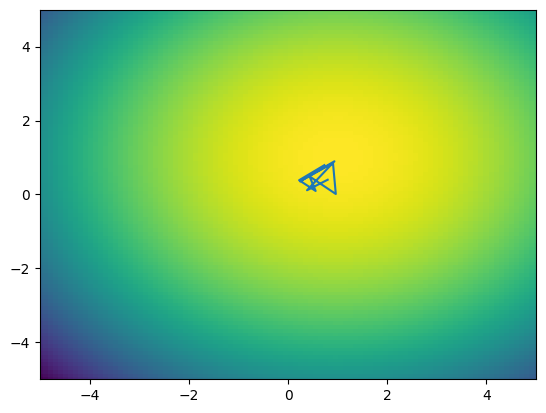

In [192]:
mu = torch.tensor([0.0,0.0],dtype=torch.float64, requires_grad=True) # 2D vector
sigma =  torch.tensor(sigma,dtype=torch.float64) # 2D convariance matrix
X = torch.tensor(data,dtype=torch.float64)  # data samples as tensor

loss = L(X, mu, sigma)  # computing loss
loss.backward()  # backpropagation
print(loss, mu.grad)
print(mu.grad)  # gradients are stored in the object


mus = [torch.rand(2) for _ in range(10)] # a list 2D mu updates (dont)
vizualize(X,mus,sigma) 

## Task 1 : MLE using gradient ascent

Find the maximum by computing gradient ascent:
$$ \mu_{t+1} = \mu_{t} + \lambda \dfrac{d}{d \mu}L(\mu) $$

1. Implement a function that does the following steps:
    - initialize $\mu_0 = (0,0)^T$
    - compute Likelihood $L(\mu)$ 
    - calculate gradient $\dfrac{d}{d \mu} L(\mu)$ using Pytorch's automatic differentiation
    - update $\mu$
    - repeat until convergence or after certain amount of steps 
2. Visualize your gradient updates
3. How does the learning rate $\lambda$ affect convergence?

Total of 98 iterations to find maximum.
tensor([0.9864, 1.0147], dtype=torch.float64, requires_grad=True)


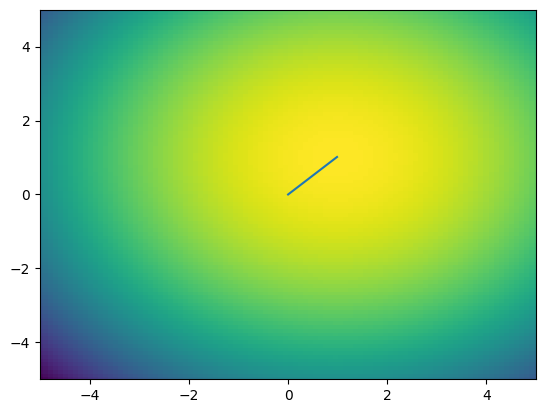

In [193]:
def MLE_Gradient_Ascent(X, sigma, lr=1e-4, eps=1e-6, max_steps=1000):

    mu = torch.tensor([0, 0], dtype=torch.float64, requires_grad=True)
    mus = [mu.detach()]
    i = 0

    while i < max_steps:

        loss = L(X, mu, sigma) # compute the log-likehood
        loss.backward() # compute the gradients
        grad = mu.grad

        if torch.norm(grad).item() < eps:
            print(f"Total of {i} iterations to find maximum.")
            break

        delta = lr * grad
        with torch.no_grad():
            mu = mu + delta
            mus.append(mu.detach())
        
        mu.grad = None
        mu.requires_grad_()
        i += 1

    return mu, mus

mu1, mus1 = MLE_Gradient_Ascent(X, sigma, lr=0.0001)
print(mu1)
vizualize(X, mus1, sigma)



### Task 1. Question 3: How does the learning rate $\lambda$ affect convergence?

If the learning rate is too large, the steps of gradient ascent at each update is also large. It can happen that we skip the maxima or training diverges. If it's too small we make litte steps and need many epochs for convergence.

## Task 2: Better Gradient Updates

1. Change your vanilla gradient updates to a more sophisticated approach.  You can use any of Pytorch's optimization methods:  https://pytorch.org/docs/stable/optim.html
2. Visualize the new gradient updates
3. How and why do these methods differ?

Total of 97 iterations to find maximum
tensor([0.9864, 1.0147], dtype=torch.float64, requires_grad=True)


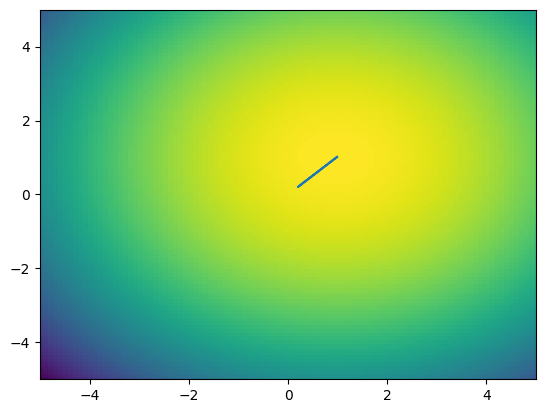

In [194]:
from torch import optim

def Better_MLE_Gradient_Ascent(X, sigma, lr=1e-4, eps=1e-6, max_steps=1000):

    mu = torch.tensor([0, 0], dtype=torch.float64, requires_grad=True)
    mus = [mu.detach()]
    optimizer = optim.SGD([mu], lr=lr)
    iters = 0

    for i in range(max_steps):
        
        loss = L(X, mu, sigma)
        optimizer.zero_grad()
        loss.backward()

        if torch.norm(mu.grad).item() < eps:
            break

        with torch.no_grad():
            mu.grad *= -1 # invert gradient for gradient ascent

        optimizer.step()
        new_mu = torch.clone(mu.detach())
        mus.append(new_mu)
        iters = i
    
    print(f"Total of {iters} iterations to find maximum")
    return mu, mus

mu2, mus2 = Better_MLE_Gradient_Ascent(X, sigma)
print(mu2)
vizualize(X, mus2, sigma)

### Task 2. Question 3: How and why do these methods differ?

In our case we use SGD, so the optimizer tries to find the minima. Because we do Gradient Ascent (GA) and wants to find a $\hat{\mu}$, such that log-likelihood is maximized, we have to invert the gradient before the update step. In that way we're doing Gradient Ascent. So GD uses all data in a update step and SGD uses one data point (mini-batch) and where GD is more precise but slower, SGD is noisy but faster.

## Task 3: Stochastic Gradients

Instead of optimizing over all data points
$$\max_\mu L(\mu) = \log (p(D;\mu, \Sigma))$$ 

take smaller random subsets $\hat{D} \subset D$ and optimize over approximation:
    $$\max_\mu \hat{D}(\mu) = \log (p(\hat{D};\mu, \Sigma))$$ 

1. Change your optimization method by taking random subsets of $\hat{D} \subset D$ in each iteration. 
    - How does the size $k:=|\hat{D}|$ affect convergence?
2. Visualize the log-likelihood over the whole data and for smaller subsets $k \in \{1, 5, 10, 100, 1000, ...\}$
    - What conclusions can you make?

In [195]:
def select_mini_batch(X, batch_size=100):
    n = X.shape[0]
    idcs = np.random.choice(range(0, n), size=batch_size, replace=False)
    mini_batch = X[idcs]
    return mini_batch

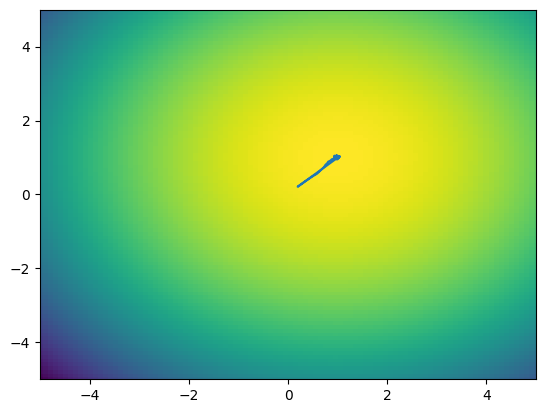

Batch size: 1000
mu: tensor([1.0064, 1.0024], dtype=torch.float64, requires_grad=True)
Total steps: 180


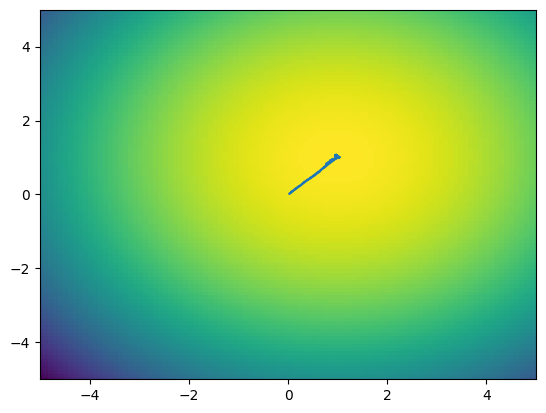

Batch size: 100
mu: tensor([1.0005, 1.0073], dtype=torch.float64, requires_grad=True)
Total steps: 600


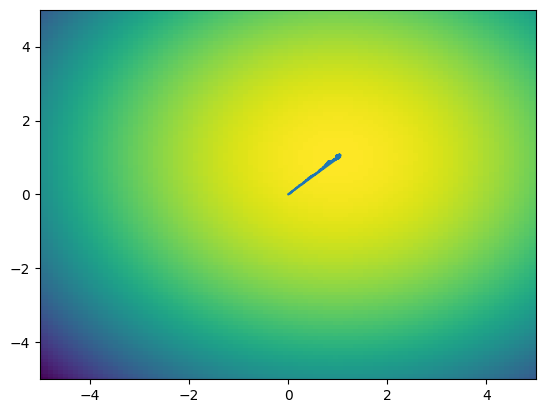

Batch size: 10
mu: tensor([1.0046, 0.9858], dtype=torch.float64, requires_grad=True)
Total steps: 6000


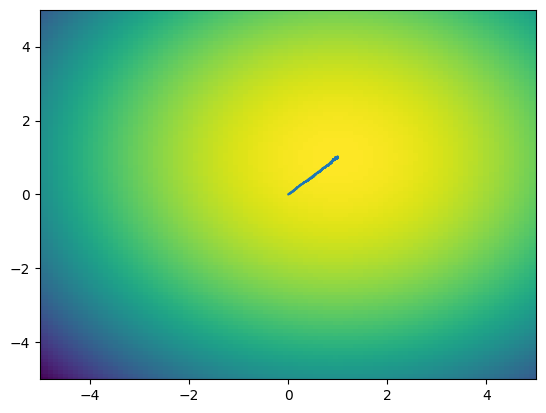

Batch size: 5
mu: tensor([0.9902, 0.9930], dtype=torch.float64, requires_grad=True)
Total steps: 4000


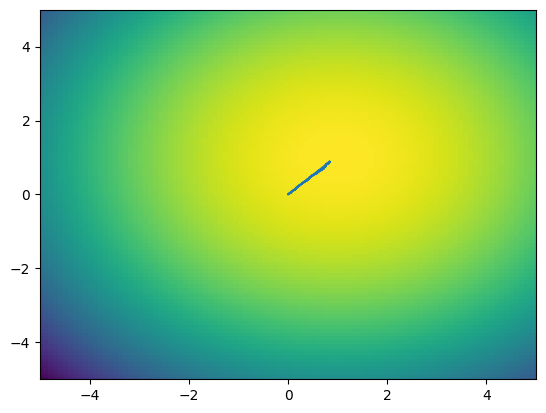

Batch size: 1
mu: tensor([0.8396, 0.8830], dtype=torch.float64, requires_grad=True)
Total steps: 10000


In [196]:
def Better_MLE_Gradient_Ascent_Mini_Batch(X, sigma, k_s, max_steps, lr=1e-3, eps=1e-6):

    all_data = []
    for k, max_step in zip(k_s, max_steps): # iterate over all batch sizes

        mu = torch.tensor([0, 0], dtype=torch.float64, requires_grad=True)
        mus = [mu.detach()]
        optimizer = optim.SGD([mu], lr=lr)
        iters = 0

        for i in range(max_step):
        
            mini_batch = select_mini_batch(X, k)
            loss = L(mini_batch, mu, sigma)
            optimizer.zero_grad()
            loss.backward()

            if torch.norm(mu.grad).item() < eps:
                break

            with torch.no_grad():
                mu.grad *= -1 # invert gradient for gradient ascent

            optimizer.step()
            new_mu = torch.clone(mu.detach())
            mus.append(new_mu)
            iters = i

        all_data.append((mu, mus, iters+1, k))
    
    return all_data

k_s = [1000, 100, 10, 5, 1]
max_steps = [180, 600, 6000, 4000, 10000]
mle_data = Better_MLE_Gradient_Ascent_Mini_Batch(X, sigma, k_s, max_steps)

for mu, mus, iters, bs in mle_data:
    vizualize(X, mus, sigma)
    print(f"Batch size: {bs}")
    print(f"mu: {mu}")
    print(f"Total steps: {iters}")



### Task 3. Question 1: How does the size $k:=|\hat{D}|$ affect convergence?

Between $k$ and the convergence of the algorithm exists a correlation. Choosing a large $k$ e.g. $k = 1000$ means we sample a large sub-set of the data and the model gets to see most of the data in relatively few iterations, meaning the algorithm can step faster in the direction of the maxima in a short amount of time, because it faster understands the distribution of the data.

Similarly if we choose a small $k$, the model needs more iterations in order to to estimate the true parameters which describes the underlying distribution of the data, thus the convergence is slower.

### Task 3. Question 2: What conclusions can you make?

This leads to the conclusion, that choosing $k$ smartly is essential for effective and efficient parameter estimation.